In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('Kaizen_data.csv')
df.head()

,Kaizen_title,background,baseline,issue
0,Optimalisasi Output Toy FF031 di Proses Tampo,Output Toy FF031 belum optimal,Average Output di bawah 600 pcs / hours,NaN
1,TP - Toy Combine,Ketika terjadi problem pada nest atau mesin ma...,Nest hanya terdapat 1,NaN
2,Standardization Planning & Operation Subcon Ot...,Planning & operation di Decalindo belum standa...,Keterlambatan kedatangan material P/N HLW05-40...,"Subcon process information is not detail \n,1...."
3,Molding Center Operation Cost Analysis,Need to analyze the operation cost impact of P...,Space Kaizen 2021: https://mattelcorp.sharepoi...,Operation Cost & Impact on moving on new build...
4,STANDARDIZE HOPPER ON MACHINE WITH LEVEL LOADI...,"MATERIAL SHORTAGE DURING RUNNING PRODUCTION,SI...","HOPPER TOO SMALL FOR BIG RUN RATE PRODUCTION,S...",MATERIAL SHORTAGE


In [144]:
print(df.describe())
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

                          Kaizen_title background  \
count                             3849       3753   
unique                            3776       2561   
top     PO - Kaizen New Line Toy HGM62   New line   
freq                                 4        186   

                                   baseline issue  
count                                  3740  3359  
unique                                 3003  3319  
top     CT tidak balance di beberapa proses     -  
freq                                    222    12  
Kaizen_title      0
background       96
baseline        109
issue           490
dtype: int64
                                           Kaizen_title  \
0         Optimalisasi Output Toy FF031 di Proses Tampo   
1                                      TP - Toy Combine   
13    Establish robust maintenance system to avoid u...   
19                  Wrong Composition Layer Improvement   
24       PD - Planning Machine Schedule for new toy DIJ   
...                        

In [145]:
df['background'] = df['background'].fillna(df['Kaizen_title'])
df['baseline'] = df['baseline'].fillna(df['Kaizen_title'])
df['issue'] = df['issue'].fillna(df['Kaizen_title'])

print(df.isnull().sum())

# if background, baseline, issue only have '-' then replace with Kaizen_title
df['background'] = df['background'].replace('-').fillna(df['Kaizen_title'])
df['baseline'] = df['baseline'].replace('-').fillna(df['Kaizen_title'])
df['issue'] = df['issue'].replace('-').fillna(df['Kaizen_title'])

# tampilkan data yang mengandung '-' pada background, baseline, issue
print(df[(df['background'] == '-') | (df['baseline'] == '-') | (df['issue'] == '-')])





Kaizen_title    0
background      0
baseline        0
issue           0
dtype: int64
Empty DataFrame
Columns: [Kaizen_title, background, baseline, issue]
Index: []


In [146]:
# change all text to lower case
df['background'] = df['background'].str.lower()
df['baseline'] = df['baseline'].str.lower()
df['issue'] = df['issue'].str.lower()
df['Kaizen_title'] = df['Kaizen_title'].str.lower()

# remove extra whitespace
df['background'] = df['background'].str.strip()
df['baseline'] = df['baseline'].str.strip()
df['issue'] = df['issue'].str.strip()
df['Kaizen_title'] = df['Kaizen_title'].str.strip()

# remove duplicate tittle
df = df.drop_duplicates(subset='Kaizen_title', keep='first')

# remove punctuation
df['background'] = df['background'].str.replace(r'[^\w\s]', '', regex=True)
df['baseline'] = df['baseline'].str.replace(r'[^\w\s]', '', regex=True)
df['issue'] = df['issue'].str.replace(r'[^\w\s]', '', regex=True)
df['Kaizen_title'] = df['Kaizen_title'].str.replace(r'[^\w\s]', '', regex=True)

df.head()

,Kaizen_title,background,baseline,issue
0,optimalisasi output toy ff031 di proses tampo,output toy ff031 belum optimal,average output di bawah 600 pcs hours,optimalisasi output toy ff031 di proses tampo
1,tp toy combine,ketika terjadi problem pada nest atau mesin ma...,nest hanya terdapat 1,tp toy combine
2,standardization planning operation subcon oth...,planning operation di decalindo belum standar...,keterlambatan kedatangan material pn hlw054021...,subcon process information is not detail \n1th...
3,molding center operation cost analysis,need to analyze the operation cost impact of p...,space kaizen 2021 httpsmattelcorpsharepointcom...,operation cost impact on moving on new buildi...
4,standardize hopper on machine with level loadi...,material shortage during running productionsil...,hopper too small for big run rate productionsi...,material shortage


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

# Fungsi untuk preprocessing teks
def preprocess_text(text, stemmer, stop_words):
    # Tokenization dan lowercase
    words = text.lower().split()
    # Stemming dan penghapusan stop words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Inisialisasi stemmer dan stop words (misalnya untuk bahasa Inggris)
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

# Preprocessing `Kaizen_title` di DataFrame (asumsikan df sudah ada)
df['Kaizen_title_preprocessed'] = df['Kaizen_title'].apply(lambda x: preprocess_text(x, stemmer, stop_words))

# Contoh input teks
input_example = "produk qulifikasi direct"

# Preprocessing input example
input_example_preprocessed = preprocess_text(input_example, stemmer, stop_words)

# Inisialisasi TfidfVectorizer dengan n-gram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit dan transform menggunakan teks yang sudah dipreprocess
X = vectorizer.fit_transform(df['Kaizen_title_preprocessed'])
input_vector = vectorizer.transform([input_example_preprocessed])

# Hitung cosine similarity
cosine_sim = cosine_similarity(input_vector, X)

# Print top 3 similar Kaizen titles
n = 3
most_similar_index = cosine_sim.argsort()[0][-n:][::-1]
print(df.iloc[most_similar_index])



                                           Kaizen_title  \
1264       product qualification for direct import toys   
1450                   new line direct import area p2s2   
2171  materialsimprove schedule direct line customer...   

                                             background  \
1264  urgent shipment yang baru dikomunikasikan saat...   
1450  line untuk area di pada saat pick season over ...   
2171  menggolah data masih secara manual data custom...   

                                               baseline  \
1264  1 dari 3 toy di ternyata urgent shipment saat ...   
1450  terdapat 2 line yang running dan sudah over lo...   
2171  membutuhkan waktu pengerjaan untuk 1 toy  4 me...   

                                                  issue  \
1264  belum ada peringatan sewaktu membuat pq schedu...   
1450  line untuk p2s2 pada saat peak season kurang s...   
2171  master planner menggabungkan schedule untuk cu...   

                              Kaizen_title_preproces

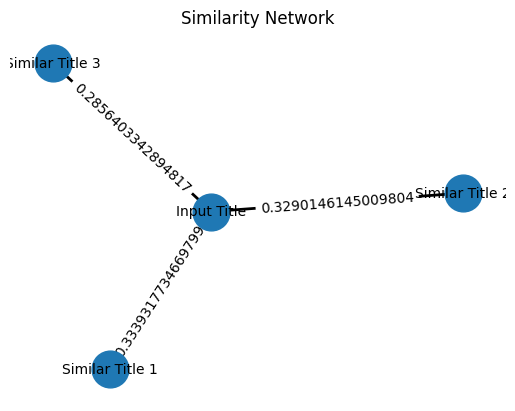

In [148]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Add nodes for the input and most similar titles
G.add_node(input_example, label='Input Title')
for i, idx in enumerate(most_similar_index):
    similar_title = df.iloc[idx]['Kaizen_title']
    # Menambahkan node similar_title dengan label dan indeks
    G.add_node(similar_title, label='Similar Title {}'.format(i+1), index=idx)
    # Menambahkan edge antara input_example dan similar_title dengan bobot cosine similarity dan indeks
    G.add_edge(input_example, similar_title, weight=cosine_sim[0][idx], index=i)

# Plot graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw labels
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show plot
plt.title('Similarity Network')
plt.axis('off')
plt.show()